# POE user analyzing project
###### **Data reference and questions are here: https://www.kaggle.com/datasets/gagazet/path-of-exile-league-statistic**

---
Hi, I'm Angela. 😊 I'm a novice in data analysis.  I'm a novice in data analysis. I'm interested in the video games, mobility, culture, and content industry. I hope to become a data scientist with anomaly detection and anti-cheating. I hope that my analysis will have a positive impact on the world at least a little bit.  

This is my first Kaggle-data analyzing project on my own. I played(?) with this data for almost a month or more freely, and I finish it to start to answer these questions partially. Finally, I can close the analysis joyfully.
I analyzed this data set with my thoughts and what I learned (as if I were a game analyst 😆).  
_ps. English may seem a little awkward because it is not my first language. I'm sorry. And I used the word 'average' more than the word 'mean' because I wanted to communicate more clearly in my hectic writing. 'mean' is so mean to 'average', 'mean' means 'mean' and... just joking._ 🤪

---
##### **Questions for participants**

1. A total number of players in each division, usage of each class in descending order.
2. Some of the players streaming their game (twitch column). Do they play better than people, who does not?
3. Predict chance to be at top 30 in each division, if we are Necromancer. With and without stream.
4. Average number of finished challanges for each division, show division with highest and lowest average challanges.
5. Show dependency between level and class of died characters. Only for HC divisions.


##### **Contents list**
---
1. data remaking (dummy etc)
2. data distribution (all round veiwing)
3. questions : result, processing, add commentary(그외 추가 이야기 및 부족한 것 필요한 것 개선 방향)
4. what I analized with this dataset(my files)

## Importing Data and Libraries
---

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

# import time as time

import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

# visualization setting
plt.rcParams['axes.facecolor'] = 'white'

# import tensorflow as tf
# import keras

np.random.seed(0)
# tf.random.set_seed(0)

# version check
print(sns.__version__)
print(pd.__version__)
print(np.__version__)
# print(tf.__version__)
# print(keras.__version__)

data = pd.read_csv("poe_stats.csv")

# if you need
# !pip install joypy

0.11.2
1.4.1
1.22.4


In [2]:
df = data
df.head(10)

,rank,dead,online,name,level,class,id,experience,account,challenges,twitch,ladder
0,1,False,False,Tzn_NecroIsFineNow,100,Necromancer,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,4250334444,TheTzn,40,thetzn,Harbinger
1,1,False,False,RaizNeverFirstQT,100,Necromancer,8f3216db5ac9106c287a834731aafc83c387138f28fc45...,4250334444,RaizQT,22,raizqt,SSF Harbinger HC
2,1,False,False,GucciStreamerAdvantage,100,Necromancer,c6ec2dae3855c551e0597c06ef2da06fbb5512487ded7f...,4250334444,GucciPradas,35,guccipradas,Hardcore Harbinger
3,1,False,False,ChiroxPrime,100,Slayer,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,4250334444,Chiroxun,26,NaN,SSF Harbinger
4,2,False,False,Cool_NecroIsFineNow,100,Deadeye,24ae924ceed7989ef3d3d6772612832bb467a6094352c7...,4250334444,cooltail,22,NaN,Harbinger
5,2,False,False,SteelStreamerAdvantage,100,Deadeye,51acb8e6fac3cfaa7ff848151dad01b0a6f350e7525543...,4250334444,Steelmage,37,steelmage202,Hardcore Harbinger
6,2,False,False,Grom_WhyGodThreeCmWhy,100,Gladiator,5d8b80b2bdd30f3dba1036a6791187562758935e8d4723...,4250334444,rocklegend,22,gromick,SSF Harbinger HC
7,2,False,False,beobio_capitan,100,Inquisitor,65c58f9b186e1fbe9f927484f3f178cdb9ee0dc2427289...,4250334444,TishaVosemsot,40,beobio,SSF Harbinger
8,3,False,False,Rami_The_Negromaniac,100,Necromancer,00c0030fc548cc4c0d804564f8fb356610044b7e6d484f...,4250334444,rami1337,40,rami1337,Harbinger
9,3,False,False,FutonBlewAway,100,Raider,46e56572ff6e403f45fac597240e13e9af225f06ca4e52...,4250334444,pleaGRC,40,NaN,SSF Harbinger


## Data summary

In [3]:
# options about float

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,rank,level,experience,challenges
count,"59,776.00","59,776.00","59,776.00","59,776.00"
mean,"7,495.37",85.42,"1,825,786,027.36",25.76
std,"4,330.18",11.29,"1,094,747,934.61",8.44
min,1.00,53.00,"77,909,816.00",4.00
25%,"3,745.00",78.00,"777,469,746.25",19.00
50%,"7,492.00",90.00,"1,934,009,687.00",25.00
75%,"11,247.00",95.00,"2,876,116,901.00",33.00
max,"15,000.00",100.00,"4,250,334,444.00",40.00


In [4]:
df.describe(include = 'object')

,name,class,id,account,twitch,ladder
count,59776,59776,59776,59776,16300,59776
unique,58286,26,59776,37123,9613,4
top,_Flic_,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,chuz101,thespunkylobster,SSF Harbinger
freq,14,8711,1,30,18,14981


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59776 entries, 0 to 59775
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        59776 non-null  int64 
 1   dead        59776 non-null  bool  
 2   online      59776 non-null  bool  
 3   name        59776 non-null  object
 4   level       59776 non-null  int64 
 5   class       59776 non-null  object
 6   id          59776 non-null  object
 7   experience  59776 non-null  int64 
 8   account     59776 non-null  object
 9   challenges  59776 non-null  int64 
 10  twitch      16300 non-null  object
 11  ladder      59776 non-null  object
dtypes: bool(2), int64(4), object(6)
memory usage: 4.7+ MB


# 1. rankers by ladder
---
##### Q1. A total number of players in each division, usage of each class in descending order.

First I understood that question and wanted to know about each class ratio in each ladder. And it is true maybe.  
(But... I think this question has to be more clear about 'players'. Because there're quite many users who have multiple characters which are on ranked.)  

So I categorized the meaning of 'players' as characters and users. 

## 1-1. ids(characters) and users in each ladder
If we set the meaning of ‘players’ to ‘characters’, the number of unique ids would be the answer. Also, if we set the meaning of it to 'users', the number of unique accounts would be the answer.  
Each division has different numbers of ids(characters) and accounts, and there are some empty values among the 15000.

In [6]:
# id, rank, account unique numbers

modes = ['Harbinger', 'Hardcore Harbinger', 'SSF Harbinger', 'SSF Harbinger HC']

for i in modes:
    print("* ladder:", i)
    print("  number of unique id:", df[df['ladder'] == i]['id'].nunique())
    print("  number of unique rank:", df[df['ladder'] == i]['rank'].nunique())
    print("  number of unique account:", df[df['ladder'] == i]['account'].nunique())
    print("  max value of the rank:", df[df['ladder'] == i]['rank'].max())
    if i != 'SSF Harbinger HC':
        print('---------------------------------')

* ladder: Harbinger
  number of unique id: 14918
  number of unique rank: 14918
  number of unique account: 13160
  max value of the rank: 15000
---------------------------------
* ladder: Hardcore Harbinger
  number of unique id: 14905
  number of unique rank: 14905
  number of unique account: 9020
  max value of the rank: 15000
---------------------------------
* ladder: SSF Harbinger
  number of unique id: 14981
  number of unique rank: 14981
  number of unique account: 10214
  max value of the rank: 15000
---------------------------------
* ladder: SSF Harbinger HC
  number of unique id: 14972
  number of unique rank: 14972
  number of unique account: 6374
  max value of the rank: 15000


## 1-2. characters numbers and ratios of each class in each ladder
We can all class and ladder mode put together in one data frame for analysis, and also make them separately to see more comfortably by descending order.  
First, we can compare the number of specific classes's `account` with other ladders easily.  

In [7]:
# 1. 
# pivot by class and ladder to one Data frame

df_acc_bylad = df.pivot_table(values = 'account', index = 'ladder', columns = 'class', aggfunc = lambda x: len(x.unique()), margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_acc_bylad = df_acc_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_acc_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_acc_bylad.drop(index = 26, inplace = True)
df_acc_bylad

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3278,613,941,1005,733
1,Assassin,616,170,270,70,108
2,Berserker,7813,1235,2107,1854,2692
3,Champion,1127,291,260,458,126
4,Chieftain,1964,594,449,638,291
5,Deadeye,658,151,278,155,78
6,Duelist,60,50,10,0,0
7,Elementalist,1235,361,532,151,193
8,Gladiator,4227,1149,1288,1205,648
9,Guardian,1094,83,66,603,348


## 1-3. Answer: characters numbers/ratio of each class in each ladder (descending order)
In the second method, we can compare the number of specific classes's `id` by ladder.

In [8]:
# 2. 
# if you want to see ids seperated by ladder

# Harbinger
s1 = df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Harbinger'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Pathfinder,3428,22.98
Berserker,2713,18.19
Raider,1943,13.02
Slayer,1706,11.44
Necromancer,1207,8.09
Ascendant,740,4.96
Gladiator,648,4.34
Inquisitor,559,3.75
Guardian,349,2.34


In [9]:
# Harbinger HC

s1 = df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'Hardcore Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'Hardcore Harbinger'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Necromancer,2099,14.08
Berserker,2064,13.85
Gladiator,1356,9.10
Slayer,1343,9.01
Ascendant,1149,7.71
Raider,895,6.00
Trickster,834,5.60
Inquisitor,828,5.56
Chieftain,690,4.63


In [10]:
# SSF Harbinger 

s1 = df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'SSF Harbinger'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'SSF Harbinger'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Berserker,2290,15.29
Necromancer,1716,11.45
Raider,1486,9.92
Gladiator,1320,8.81
Slayer,1301,8.68
Ascendant,1000,6.68
Trickster,955,6.37
Inquisitor,952,6.35
Hierophant,557,3.72


In [11]:
# SSF Harbinger HC

s1 = df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)
s2 = df[df['ladder'] == 'SSF Harbinger HC'].groupby(by = 'class').count()['id'].sort_values(ascending = False)  / df[df['ladder'] == 'SSF Harbinger HC'].shape[0] * 100
tmpdf = pd.DataFrame(columns = ['numbers', 'ratio'])
tmpdf['numbers'], tmpdf['ratio'] = s1, s2
tmpdf

,numbers,ratio
class,,
Necromancer,2055,13.73
Berserker,1644,10.98
Gladiator,1576,10.53
Slayer,1135,7.58
Trickster,1058,7.07
Inquisitor,1052,7.03
Ascendant,865,5.78
Raider,826,5.52
Juggernaut,734,4.90


## 1-4. Visualization

### 1-4-1. Characters number of each class in each division separately

In [12]:
df_cha_bylad = df.pivot_table(values = 'id', index = 'ladder', columns = 'class', aggfunc = 'count', margins=True, margins_name="total", fill_value = 0)

# transpose to make class as row
df_cha_bylad = df_cha_bylad.sort_values(ascending = False, by = 'ladder').transpose()
df_cha_bylad.reset_index(drop = False, inplace = True)

# drop 'index = 26 'total' row '
df_cha_bylad.drop(index = 26, inplace = True)
df_cha_bylad.head(3)

ladder,class,total,SSF Harbinger HC,SSF Harbinger,Hardcore Harbinger,Harbinger
0,Ascendant,3754,865,1000,1149,740
1,Assassin,679,225,274,72,108
2,Berserker,8711,1644,2290,2064,2713


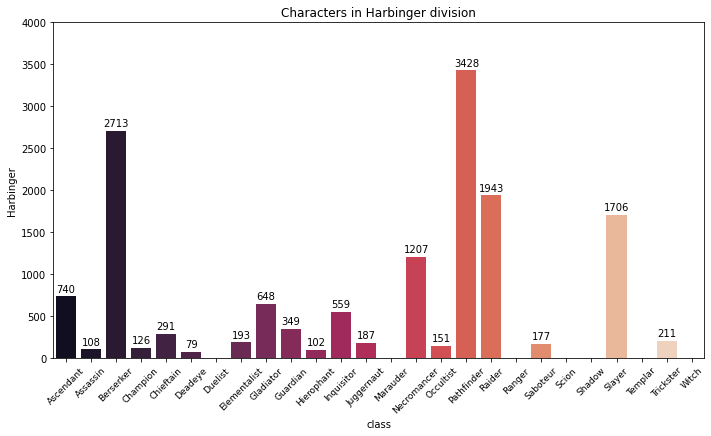

In [13]:
# if you want to see 'characters' number as seperated by ladder (case when 'Harbinger')

plt.subplots(figsize = (10, 6))

plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom=0, top=4000)
plt.xticks(rotation=45, fontsize=9)

ax = sns.barplot(x = 'class', y = 'Harbinger', data = df_cha_bylad, palette = "rocket")
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
plt.tight_layout()
plt.title('Characters in Harbinger division')
plt.show()

In [14]:
# # if you want to see 'characters' number as seperated by ladder, others 


# # Hardcore Harbinger 
# plt.subplots(figsize = (10, 6))

# plt.xlabel('Class name')
# plt.ylabel('Number of id')
# plt.ylim(bottom=0, top=4000)
# plt.xticks(rotation=45, fontsize=9)

# ax = sns.barplot(x = 'class', y = 'Hardcore Harbinger', data = df_cha_bylad, palette = "rocket")
# for p in ax.patches: 
#     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
# plt.tight_layout()
# plt.title('Characters in Hardcore Harbinger division')
# plt.show()


# # SSF Harbinger 
# plt.subplots(figsize = (10, 6))

# plt.xlabel('Class name')
# plt.ylabel('Number of id')
# plt.ylim(bottom=0, top=4000)
# plt.xticks(rotation=45, fontsize=9)

# ax = sns.barplot(x = 'class', y = 'SSF Harbinger', data = df_cha_bylad, palette = "rocket")
# for p in ax.patches: 
#     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
# plt.tight_layout()
# plt.title('Characters in SSF Harbinger division')
# plt.show()


# # SSF Hardcore Harbinger 
# plt.subplots(figsize = (10, 6))

# plt.xlabel('Class name')
# plt.ylabel('Number of id')
# plt.ylim(bottom=0, top=4000)
# plt.xticks(rotation=45, fontsize=9)

# ax = sns.barplot(x = 'class', y = 'SSF Harbinger HC', data = df_cha_bylad, palette = "rocket")
# for p in ax.patches: 
#     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
#        ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
#        textcoords='offset points') 
# plt.tight_layout()
# plt.title('Characters in SSF Hardcore Harbinger division')
# plt.show()

### 1-4-2. Characters number by division and class 
without number texts.

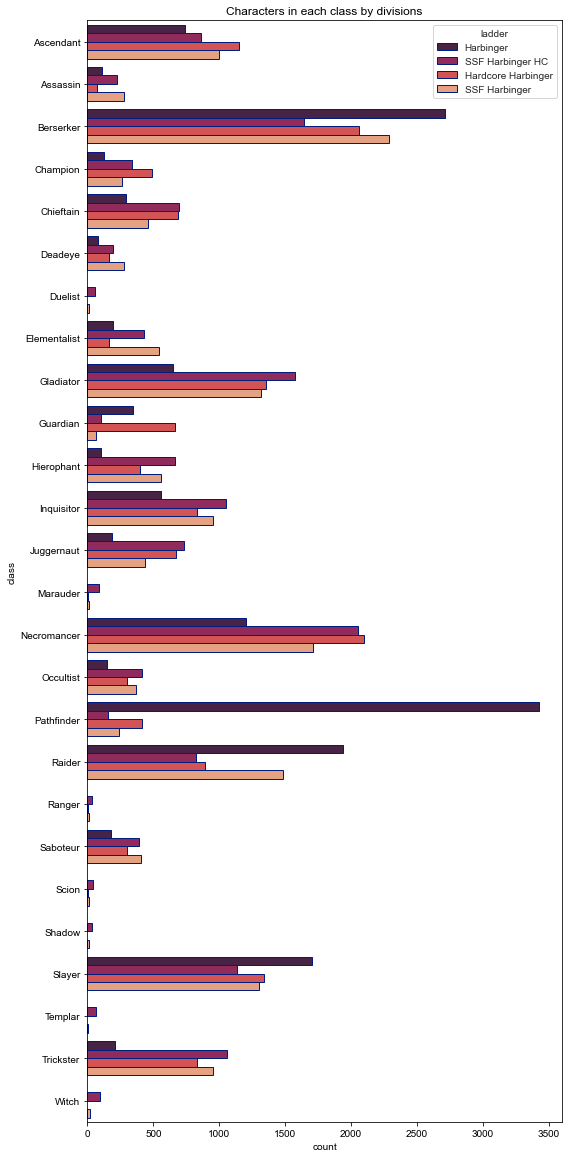

In [15]:
# if you want to see all of them

orderlist = list(df_cha_bylad['class'])

plt.rcParams["figure.figsize"] = (8, 16)
plt.xlabel('Class name')
plt.ylabel('Number of id')
plt.ylim(bottom = 0, top = 4000)
plt.xticks(rotation=0, fontsize=10)
sns.set_style('whitegrid')
ax = sns.countplot(data = df, y = 'class',
              palette="rocket", edgecolor = sns.color_palette("dark", 1), hue = 'ladder', order = orderlist) 
plt.tight_layout()
plt.title('Characters in each class by divisions')
plt.show()

## 1-5. Conclusion:
We checked the specific number needed. And there are some preferred classes in each ladder.  

In Harbinger, the most common mode, Pathfinder is the most one.  
And Necromancer is the most preferred in Harbinger hardcore mode. (Berserk was on the same level.)  
In SSF Harbinger, the solo mode, the most picked one is Berserker and Necromancer is also preferred too.  
In SSF Harbinger hardcore, the most one is Necromancer and Berserker is also preferred.  

- Necromancer or Berserker are preferred in some modes, but Pathfinder is the most preferred class, only in Harbinger mode.  
- And we may have to consider that all of them(Necromancer and Berserker and Pathfinder) are one-stat classes later. (Each class is among the Intelligence, Strength, and Dexterity stat.)  

◎ As a result, you can find the preferred class in each mode and find out 'the imbalance in performance between classes' or 'the advantageous skills in certain modes' to see if there is a problem with game balance.

# 2. Are streamers better or not?
---
##### Q2. Some of the players streaming their games (twitch column). Do they play better than people who do not stream?

**Before analyzing, I gave shape to the question. This was important to solve this question especially because the ‘better play’ meaning is a little ambiguous.**

1. We have to set the standard of 'play better' means, so I treat the rank of characters to the 'better play'. Maybe there are more criteria like ranking of 'exp' or 'level', 'challenge' contrasts.  
    But I just used the **rank** because they are ranked players, they are already skilled enough to not need to base their rankings on the number of challenges or levels. In addition, there are many variables that affect classes, parties, items, and skill trees to compare the players. And each mode has a different environment. On other criteria other than game modes, we cannot know and use everything in detail.  

2. And there are some cases where one twitch streamer has multiple accounts or characters. And also, one user has multiple characters on a rank chart. (I discovered it when I analyze the dataset before this project.) So I assumed that one account or one twitch id means one user(the one twitch ‘player’ has multiple accounts or characters or the one ‘player’ has multiple characters).  

3. And there're some missing rank values in each ladder. (When I analyzed the data personally, I substituted the missing data by updating it to rank only the data we have. But,) anyway, I used the original rank in this analysis.  

4. Plus, And I decided to use rank, but how should we decide the ability(rank) to represent one user? My words mean, which one is more accurate, the rank average or median of several characters a user has. I thought it would be ideal if the number of data in a user's ranking was more than 30. But the reality wasn't, so we used both for this analysis.  

5. And I set their highest rank as their representative values. Because it's a question of how well they do, so we can treat the best score(rank) as a kind of their performance.

6. sequence
    1. normally get the average from all dataframe
    2. get the average from each player(user)'s average rank and compare
    3. get the average from each player(user)'s median rank and compare
    4. get the average from each player(user)'s highest rank and compare
    5. statistical significance test (Mann Whitney U test)

(You can skip to 2-5.)

In [16]:
df['twitch'].describe()

count                16300
unique                9613
top       thespunkylobster
freq                    18
Name: twitch, dtype: object

In [17]:
# Not streaming users
df[df['twitch'].isna() == True].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,43476,43476,43476,43476,0,43476
unique,42342,26,43476,27505,0,4
top,_Flic_,Berserker,c861372da792be0b22c45bf437ccd58437c52e9455e0bf...,chuz101,NaN,SSF Harbinger
freq,14,6372,1,30,NaN,12320


In [18]:
# Twitch streaming users
df[df['twitch'].isna() == False].describe(include = 'object')

,name,class,id,account,twitch,ladder
count,16300,16300,16300,16300,16300,16300
unique,15946,26,16300,9618,9613,4
top,Cya,Berserker,3dcddd59f5088893f734f39686350990dae168cc4f4b00...,TheSpunkyLobster,thespunkylobster,Hardcore Harbinger
freq,8,2339,1,18,18,5452


In [19]:
# you can see how much missing values in rank are there by ladder

print(df[df['ladder'] == 'Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'Hardcore Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger']['rank'].nunique())
print(df[df['ladder'] == 'SSF Harbinger HC']['rank'].nunique())

14918
14905
14981
14972


### dividing data

Let's divide the dataset as whether 'twitch' user or not.  
And divide them by person(twitch unique value is first in the twitch column)'s average.  


In [94]:
# Let's divide the dataset as whether 'twitch' column is null or not

# each id's rank
df_twt = df[df['twitch'].isna() == False]
df_twt_non = df[df['twitch'].isna() == True]

# each user's mean rank
# grouping by player and get the 'average' rank of each player streaming on twitch or not
df_twt_mean = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'mean')
df_twt_non_mean = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'mean')

# each user's median rank
# grouping by player and get the 'median' rank of each player streaming on twitch or not
df_twt_med = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'median')
df_twt_non_med = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'median')

# each user's min(highest) rank
# grouping by player and get the 'median' rank of each player streaming on twitch or not
df_twt_min = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'min')
df_twt_non_min = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'min')

## 2-1. normal average and median of rank simply

normally get the average and median from all dataframe, and checking standard deviation

In [21]:
# twtich streamers and not streaming users's rank 'average' of each 'id'
print(df_twt['rank'].mean())
print(df_twt_non['rank'].mean())

7101.554355828221
7643.018308952065


In [22]:
# twtich streamers and not streaming users's rank 'median' of each 'id'
print(df_twt['rank'].median())
print(df_twt_non['rank'].median())

6960.5
7684.0


It seems that the rank of users who stream is about 500 higher.  
Considering the total ranking is 15,000, the difference of 500 is about one-thirty, so it's not a small difference, but it doesn't seem to be a very big difference.  
And the median showed a bigger difference. 

In [23]:
# check the standard deviation

print("All users rank : \n", df['rank'].std())
print("Streaming users rank : \n", df_twt['rank'].std())
print("Not-streaming users rank : \n", df_twt_non['rank'].std())

All users rank : 
 4330.179897702609
Streaming users rank : 
 4393.701617302437
Not-streaming users rank : 
 4296.88083653341


## 2-2. average by account (when we set the average to a representative value)

Get the average values from each player(user)'s average rank. And check the average and median of them.

In [24]:
# example of users' rank average.
# grouping by twitch and get average 'rank' of each player streaming on twitch
df_twt_mean.sample(5)

,rank
twitch,
alaskasworld,"8,700.00"
tman0112,"14,909.00"
xanity_poe,"11,520.00"
icy_veinz,"5,704.50"
cengaaver,"7,397.00"


In [25]:
# grouping by twitch and get average 'rank' of each non_streaming players
df_twt_mean.sample(5)

,rank
twitch,
bludstained,"11,289.00"
theduocsi,"4,838.00"
artymiss,"7,664.67"
moscorpion,"1,933.00"
sh1nrax,"8,921.00"


In [26]:
# get the average of each player's average rank
print(df_twt_mean['rank'].mean())
print(df_twt_non_mean['rank'].mean())

7479.202758592788
7966.844983149482


In [27]:
# get the median of each player's average rank
print(df_twt_mean['rank'].median())
print(df_twt_non_mean['rank'].median())

7425.0
8037.0


## 2-3. median rank of each player and get average(when we set the median to a representative value)

Get the average from each player(user)'s median rank

In [28]:
# example of users' rank median.
# grouping by twitch and get median 'rank' of each player streaming on twitch
df_twt_med.sample(5)

,rank
twitch,
twitchaccoutforsmite,"12,043.00"
y2k32,"4,009.00"
shock268,"3,627.00"
lagmastersam,"10,121.50"
thorloph,"12,150.50"


In [29]:
# grouping by twitch and get median 'rank' of each non_streaming players
df_twt_non_med.sample(5)

,rank
account,
v1rus66,"7,237.00"
flieskiller,"8,374.00"
Olympus1111,"3,269.00"
Sevenzera,"11,850.00"
NjNoLoVe_,"14,032.00"


In [30]:
# get the average of each player's median rank
print(df_twt_med['rank'].mean())
print(df_twt_non_med['rank'].mean())

7435.413606574431
7939.01946918742


In [31]:
# get the median of each player's median rank
print(df_twt_med['rank'].median())
print(df_twt_non_med['rank'].median())

7395.5
8039.5


## 2-4. highest rank of each player and get average(when we set the min rank to a representative value)

Get the average from each player(user)'s minimum rank

In [32]:
# example of users' rank min.
# grouping by twitch and get min 'rank' of each player streaming on twitch
df_twt_min.sample(5)

,rank
twitch,
twizzm,3021
longtimeiurker,2100
theyellowcake,10565
jernou,13291
dakkar90,6374


In [33]:
# grouping by twitch and get min 'rank' of each non_streaming players
df_twt_non_min.sample(5)

,rank
account,
Whatasimplename,889
Tyr247,9968
NietchevY,3976
petenc_,6159
idlesouse,10903


This could be a little smaller than other results. But I think it still has the meaning of comparison.

In [34]:
# get the average of each player's highest(min) rank
print(df_twt_min['rank'].mean())
print(df_twt_non_min['rank'].mean())

6446.104337875793
7126.692019632794


In [35]:
# get the median of each player's highest(min) rank
print(df_twt_min['rank'].median())
print(df_twt_non_min['rank'].median())

5988.0
6954.0


If you compare them by the median, it's almost 1000 points difference.

## 2-5. Visualizing each value
For convenience, I will call a user who does not stream as a 'normal' user.  

And I'll show the means at the Mann-Whitney Test, with a confidence interval. 

In [36]:
dset = [df_twt['rank'], df_twt_non['rank'], 
       df_twt_mean['rank'], df_twt_non_mean['rank'], 
       df_twt_med['rank'], df_twt_non_med['rank'],
       df_twt_min['rank'], df_twt_non_min['rank']]

x = ['Arithmetic mean - All Twitch_user', 'Arithmetic mean - All normal_user', 
     'Mean of rank average - Twitch_user', 'Mean of rank average - normal_user', 
     'Mean of rank median - Twitch_user', 'Mean of rank median - normal_user', 
     'Mean of rank minimum - Twitch_user', 'Mean of rank minimum - normal_user']

y1 = [x.mean() for x in dset]
y2 = [x.median() for x in dset]

tmp1 = pd.DataFrame(columns = x, data = [y1, y2], index = ['Mean', 'Median'])
tmp1.T

,Mean,Median
Arithmetic mean - All Twitch_user,"7,101.55","6,960.50"
Arithmetic mean - All normal_user,"7,643.02","7,684.00"
Mean of rank average - Twitch_user,"7,479.20","7,425.00"
Mean of rank average - normal_user,"7,966.84","8,037.00"
Mean of rank median - Twitch_user,"7,435.41","7,395.50"
Mean of rank median - normal_user,"7,939.02","8,039.50"
Mean of rank minimum - Twitch_user,"6,446.10","5,988.00"
Mean of rank minimum - normal_user,"7,126.69","6,954.00"


##### visualization - median rank and distribution with boxplot

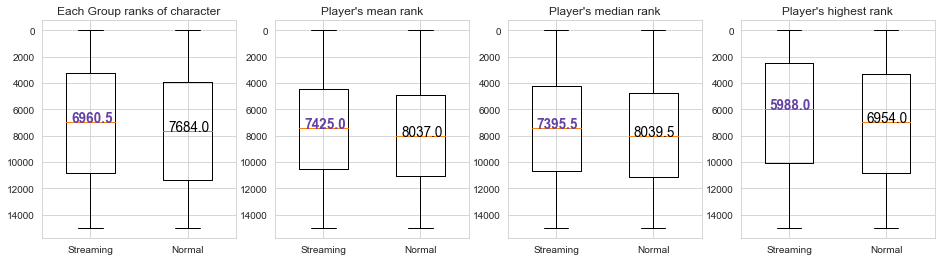

In [37]:
# Visualization - median rank and distribution
data_frames = [df_twt, df_twt_mean, df_twt_med, df_twt_min]
data_frames_non = [df_twt_non, df_twt_non_mean, df_twt_non_med, df_twt_non_min]

titles = ['Each Group ranks of character', "Player's mean rank", "Player's median rank", "Player's highest rank"]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.boxplot([data_frames[i]['rank'], data_frames_non[i]['rank']],
               widths=0.5,
               labels=['Streaming', 'Normal'])
    ax.invert_yaxis()
    ax.text(0.8, data_frames[i]['rank'].median(), data_frames[i]['rank'].median(),
            size=13.5, weight='bold', color='#6441a5')
    ax.text(1.8, data_frames_non[i]['rank'].median(), data_frames_non[i]['rank'].median(),
            size=13.5, color='black')
    ax.set_title(titles[i])

plt.show()

## 2-6. Mann Whitney U test: Statistical significance

The T-test is a test about a statistical comparison of the means of two independent samples, as you know. But these are rank scales, so it's hard to treat this data as a normal t-test case. (Of course, it's hard to say that the simple process of calculating the mean and median ‘absolutely’ doesn’t have a problem…) So I decided to use Mann Whitney U Test, which is a nonparametric method.

*I don't think the statistical significance is not significant for this, especially with little size data. The data size is so little so we can't discuss Gaussian distribution or etc. But I think it's meaningful just to check even if it's not used somewhere.*

What I was wondering about was which one I have to use among these to reach a conclusion, `df_twt`, `df_twt_mean`, `df_twt_med`, `df_twt_min`. They have each problem with themselves.

1. First, I think the `df_twt` and `df_twt_non` have a critical problem in that there are multiple characters a single user has. It can't be a real answer to the meaning(intention) of question.  
2. Second, in case of `df_twt_mean`, there is also a problem with the average rank by each player (not one character, but a user). It's also questionable that the average itself represents the user, which makes it easier to conflict with the concept of average because it's a rank, not a score.  
3. Third, in case of `df_twt_med`, I think the median is not bad because it is ‘real’ value. But there’s also a problem. There is a tendency to add or subtract the existence of other details.  
4. `df_twi_min`, indicating the highest performance of each player, can be a good indicator of the problem in the desired, correct direction of this question. However, considering that there is a difference in difficulty between modes(ladder), there is a problem in that it shouldn't be treated as the same rank is the same ability.


After much consideration, we decided to count the number of drops and the degree of drops for Twitch users **who have a lower value than the mean of the normal user for each method**. I would be grateful if I can get advice about this. 😚

### 2-6-1. Normality test and equal-variance checking

In [38]:
# dset = [df_twt['rank'], df_twt_non['rank'], 
#        df_twt_mean['rank'], df_twt_non_mean['rank'], 
#        df_twt_med['rank'], df_twt_non_med['rank'],
#        df_twt_min['rank'], df_twt_non_min['rank']]

# x = ['Arithmetic mean - All Twitch_user', 'Arithmetic mean - All normal_user', 
#      'Mean of rank average - Twitch_user', 'Mean of rank average - normal_user', 
#      'Mean of rank median - Twitch_user', 'Mean of rank median - normal_user', 
#      'Mean of rank minimum - Twitch_user', 'Mean of rank minimum - normal_user']

i1 = ['Arithmetic Mean', 'Arithmetic Mean', 'Mean of average','Mean of average', 'Mean of median','Mean of median', 'Mean of minimum', 'Mean of minimum']
i2 = ['t', 'n']*4
c1 = ['statistic', 'pval']

pd.options.display.float_format = '{:,.4f}'.format
tmp = pd.DataFrame(index = [i1, i2], columns = c1)

"""=== Normal-test ==="""
for i in range(len(dset)):
    res1 = scipy.stats.normaltest(dset[i])
    tmp.loc[(i1[i], i2[i]), 'statistic'] = res1[0]
    tmp.loc[(i1[i], i2[i]), 'pval'] = res1[1]
tmp

statistic   pval
Arithmetic Mean t 15,184.9171 0.0000
                n 35,616.7929 0.0000
Mean of average t  1,650.4298 0.0000
                n  5,194.1758 0.0000
Mean of median  t  2,480.3602 0.0000
                n  6,986.0822 0.0000
Mean of minimum t  5,964.6213 0.0000
                n 21,181.3335 0.0000

In [39]:
i1 = ['Arithmetic Mean', 'Mean of average', 'Mean of median', 'Mean of minimum']
c1 = ['statistic', 'pval']
tmp = pd.DataFrame(index = [i1], columns = c1)

"""=== Equal-variance test ==="""
for j in range(0, len(dset), 2):
    res2 = scipy.stats.levene(dset[j], dset[j+1])
    tmp.loc[i1[j//2], 'statistic'] = res2[0]
    tmp.loc[i1[j//2], 'pval'] = res2[1]
tmp

,statistic,pval
Arithmetic Mean,22.2720,0.0000
Mean of average,0.0258,0.8724
Mean of median,1.3316,0.2485
Mean of minimum,5.2141,0.0224


### 2-6-2. Mann-Whitney U Test, T-test

In [40]:
# Just all data divided twitch column
scipy.stats.mannwhitneyu(x = dset[0], y = dset[1], alternative = 'two-sided', method = 'auto')

MannwhitneyuResult(statistic=328742306.5, pvalue=3.113355095773994e-42)

And I addedd the T-test with mean dataset and median dataset, because they are composed by represetative values.  
Let’s put in a dataframe.

In [41]:
i1 = ['Arithmetic Mean', 'Mean of average', 'Mean of median', 'Mean of minimum']
c1 = ['statistic', 'pval']*2
c2 = ['Mann_Whitney_U', 'Mann_Whitney_U', 'T_Test', 'T_Test']
tmp = pd.DataFrame(index = [i1], columns = [c2, c1])

"""=== Mann-Whitney-U Test, T-Test ==="""
for i in range(0, len(dset), 2):
    j = i//2
    res3 = scipy.stats.mannwhitneyu(x = dset[i], y = dset[i+1], alternative = 'two-sided', method = 'auto')
    res4 = scipy.stats.ttest_ind(a = dset[i], b = dset[i+1], equal_var = False, permutations = 0)
    
    tmp.loc[i1[j], (c2[0], c1[0])] = res3[0]
    tmp.loc[i1[j], (c2[0], c1[1])] = res3[1]
    tmp.loc[i1[j], (c2[2], c1[0])] = res4[0]
    tmp.loc[i1[j], (c2[2], c1[1])] = res4[1]
tmp

Mann_Whitney_U           T_Test       
                       statistic   pval statistic   pval
Arithmetic Mean 328,742,306.5000 0.0000  -13.4987 0.0000
Mean of average 122,721,825.5000 0.0000  -10.5638 0.0000
Mean of median  122,663,963.5000 0.0000  -10.6590 0.0000
Mean of minimum 119,961,555.5000 0.0000  -13.1346 0.0000

All p-values are smaller than 0.05, so we can say that 'there's no basis to consider that there are no differences between Twitch streamers and normal players.'.  

Interestingly, there is little difference in statistics in each t-test, whether using means or media. I think it is reasonable to say that whatever we use as a representative value is not very effective in this question.  


### 2-6-3. Confidence interval 
I attach the confidence interval together. We can imagine from this, "What numbers(rank) are mainly distributed in each group".

_code reference: https://jae-eun-ai.tistory.com/48_

In [42]:
from numpy import array, mean
from scipy.stats import sem, t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

# dset = [df_twt['rank'], df_twt_non['rank'], 
#        df_twt_mean['rank'], df_twt_non_mean['rank'], 
#        df_twt_med['rank'], df_twt_non_med['rank']]

llist = []
for i in dset:
    j = mean_confidence_interval(i)
    llist.append(j)

In [43]:
df_ci = pd.DataFrame(data = llist)
df_ci = df_ci.T
df_ci.columns = ['twi', 'nor', 'twi_mean', 'nor_mean', 'twi_median', 'nor_median', 'twi_min', 'nor_min']
df_ci.index = ['m', 'm-h', 'm+h']
df_ci

,twi,nor,twi_mean,nor_mean,twi_median,nor_median,twi_min,nor_min
m,"7,101.5544","7,643.0183","7,479.2028","7,966.8450","7,435.4136","7,939.0195","6,446.1043","7,126.6920"
m-h,"7,034.0989","7,602.6269","7,401.2758","7,920.8572","7,355.5067","7,892.2015","6,358.3317","7,075.5818"
m+h,"7,169.0098","7,683.4097","7,557.1297","8,012.8328","7,515.3205","7,985.8374","6,533.8770","7,177.8023"


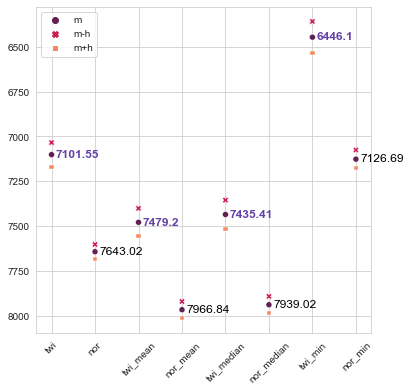

In [44]:
# Visualization
plt.figure(figsize = (6,6))
sns.scatterplot(data = df_ci.T, palette = 'rocket')
plt.xticks(rotation = 45)
plt.gca().invert_yaxis()  # reverse the y axis!

# text
colors = ['#6441a5', 'black']
for i in range(0, 8):
    if i%2 ==0:
        plt.text(i+0.1, df_ci.iloc[0, i]+15, s = round(df_ci.iloc[0, i], 2), size = 12, weight = 'bold', color = colors[0])
    else:
        plt.text(i+0.1, df_ci.iloc[0, i]+15, s = round(df_ci.iloc[0, i], 2), size = 12, color = colors[1])

plt.show()

## 2-7. "Who does not?"

I set the Twitch users' data frame and I add whether they are better or not in each case.   

If there's not any worse rank in each case, they were dropped in the data frame.  
If not, they remain in the data frame, and the number of cases when they were worse than normal users would be counted.


```python
# Let's divide the dataset as whether 'twitch' column is null or not

# each id's rank
df_twt = df[df['twitch'].isna() == False]
df_twt_non = df[df['twitch'].isna() == True]

# each user's mean rank
# grouping by player and get the 'average' rank of each player streaming on twitch or not
df_twt_mean = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'mean')
df_twt_non_mean = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'mean')

# each user's median rank
# grouping by player and get the 'median' rank of each player streaming on twitch or not
df_twt_med = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'median')
df_twt_non_med = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'median')

# each user's min(highest) rank
# grouping by player and get the 'median' rank of each player streaming on twitch or not
df_twt_min = df_twt.pivot_table(index = 'twitch', values = 'rank', aggfunc = 'min')
df_twt_non_min = df_twt_non.pivot_table(index = 'account', values = 'rank', aggfunc = 'min')
```

sequences: 
1. Make all Twitch users list.
2. Get Twitch users who are under-ranked than normal users' mean, in the case of `mean` is the user's representative.  
    And make a column `case_mean`  with value `1`. (we'll use it as a value presenting how much we can say 'the Twitch user is not better than the normal users.')
3. Get Twitch users who are under-ranked than normal users' mean, in the case of `median` is the user's representative.  
    And make a column `case_med`, with the same methods as the previous one.
4. Get Twitch users who are under-ranked than normal users' mean, in the case of `minimum` is the user's representative.  
    And make a column `case_min`, just like the previous one.
5. Delete the Twitch user's twitch id who doesn't have any `1` in new columns. And count the `1` for sort.  
6. See "who does not".

In [95]:
# 1. All twitch users - the size is the number of all twitch users.
df_q2 = pd.DataFrame(df_twt['twitch'].drop_duplicates())
df_q2.size

9613

In [91]:
# we'll use this value for comparing.
df_ci

,twi,nor,twi_mean,nor_mean,twi_median,nor_median,twi_min,nor_min
m,"7,102","7,643","7,479","7,967","7,435","7,939","6,446","7,127"
m-h,"7,034","7,603","7,401","7,921","7,356","7,892","6,358","7,076"
m+h,"7,169","7,683","7,557","8,013","7,515","7,986","6,534","7,178"


In [96]:
# 2. In case of the mean is user's representative rank
df_twt_mean.reset_index(inplace = True)
tmp = df_twt_mean[df_twt_mean['rank'] > df_ci.loc['m', 'nor_mean']][['twitch']]
tmp['case_mean'] = 1

# merging 
df_q2 = pd.merge(left = df_q2, right = tmp[['twitch','case_mean']], how = 'left', on = 'twitch')

# 3. In case of the median is user's representative rank
df_twt_med.reset_index(inplace = True)
tmp = df_twt_med[df_twt_med['rank'] > df_ci.loc['m', 'nor_median']][['twitch']]
tmp['case_med'] = 1

# merging 
df_q2 = pd.merge(left = df_q2, right = tmp[['twitch','case_med']], how = 'left', on = 'twitch')

# 4. In case of the median is user's representative rank
df_twt_min.reset_index(inplace = True)
tmp = df_twt_min[df_twt_min['rank'] > df_ci.loc['m', 'nor_min']][['twitch']]
tmp['case_min'] = 1

# merging 
df_q2 = pd.merge(left = df_q2, right = tmp[['twitch','case_min']], how = 'left', on = 'twitch')
df_q2

,twitch,case_mean,case_med,case_min
0,thetzn,NaN,NaN,NaN
1,raizqt,NaN,NaN,NaN
2,guccipradas,NaN,NaN,NaN
3,steelmage202,NaN,NaN,NaN
4,gromick,NaN,NaN,NaN
...,...,...,...,...
9608,gedviss,1,1,1
9609,sadyzin,1,1,1
9610,nordic_87,1,1,1
9611,semikreisi,1,1,1


In [97]:
# 5-1. deleting
df_q2.dropna(axis = 0, how = 'all', subset = ['case_mean', 'case_med', 'case_min'], inplace = True)

# 5-2. N/A processing
pd.options.display.float_format = '{:,.0f}'.format
df_q2.fillna(0, inplace = True)

# 5-3. counting
df_q2['cnt'] = df_q2['case_mean'] + df_q2['case_med'] + df_q2['case_min']

# 5-4. you can see 'the' Twitch users! (little ambiguous)
df_q2[df_q2['cnt']!= 0].sort_values(by = 'cnt', ascending = False)

,twitch,case_mean,case_med,case_min,cnt
7215,allioness,1,1,1,3
8020,zoexer,1,1,1,3
8018,shadow13lader,1,1,1,3
8017,tygerwoody,1,1,1,3
8016,fenaen,1,1,1,3
...,...,...,...,...,...
5642,sergeanthope,0,0,1,1
5641,speediestkarma,0,0,1,1
3642,yazuka,1,0,0,1
3645,monkeydhyu,1,0,0,1


In [99]:
# get list of 'the' Twitch users!

# (1) these Twitch users are little ambiguous to be said 'not better than Normal users'!
twt_list1 = list(df_q2[df_q2['cnt']!= 0]['twitch'])

# (2) more robust methods to judging not good : these Twitch users are certain to be said 'not better than Normal users'!
twt_list2 = list(df_q2[df_q2['cnt']== 3]['twitch'])

# how much are they different?
print(len(twt_list1), len(twt_list2))

4796 3763


In [ ]:
### if you want to see the list of the twitch users, check this : 
# print(twt_list2)

### 2-7-1. idea: Improvement Direction

- (This is the same context we discussed before analyzing this question.) Existing data can define and analyze something new that can index 'ability(or skill)' based on whether `rank` is higher than `challenge` or experience.
    
    However, since this is ‘character’-limited information, we can discuss at last whether there is a more accurate difference if we find a way to create an indicator with all accounts they have. (if we do this, we must have identified information with a person and his accounts)
    
- Since ‘streaming’ is not necessarily only for users who are good at playing, it would be better to analyze users first by selecting the streamers in the Path Of Exile category within Twitch, for getting insight. 